## Gaussian Driving see the Samples!

#### Imports and Data

In [11]:
import numpy as np
import matplotlib.pyplot as plt

data=np.load('data/gaussian_driving/train_size_6_tf_10.0_dt_0.05_sigma_10_40_c_0_4.0_noise_100_n_dataset_15000.npz')

h=data['potential']
z=data['density']
t=data['time']

print(t.shape)



(200,)


#### Test the normalization

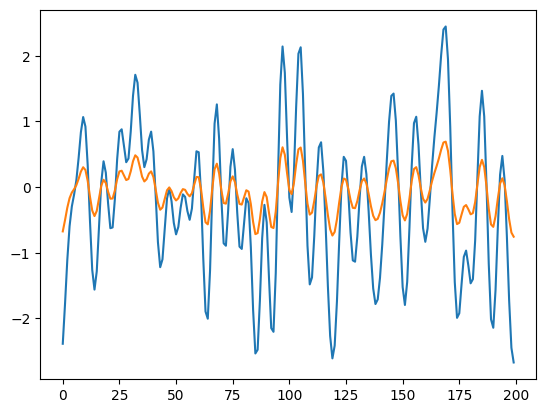

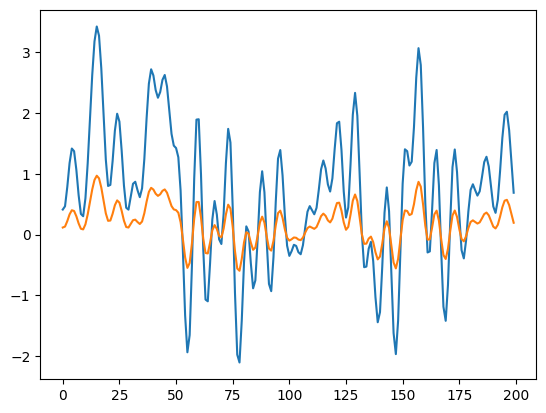

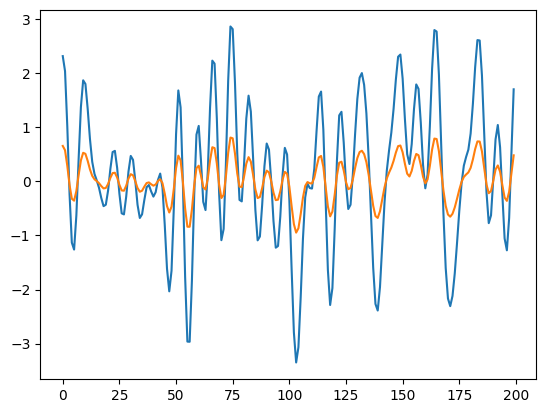

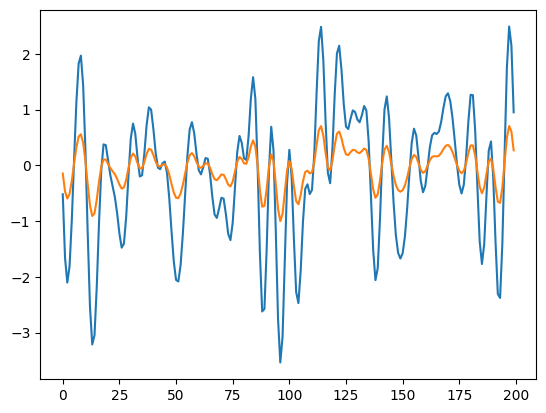

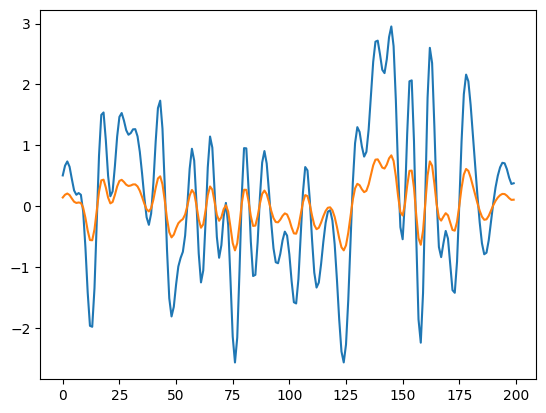

In [16]:
maxh=np.max(np.abs(h),axis=(-1,-2))
norm=maxh

x=h/norm[:,None,None]




for i in range(5):
    plt.plot(h[0,:,i])
    plt.plot(x[0,:,i])
    plt.show()


(150, 200, 6)


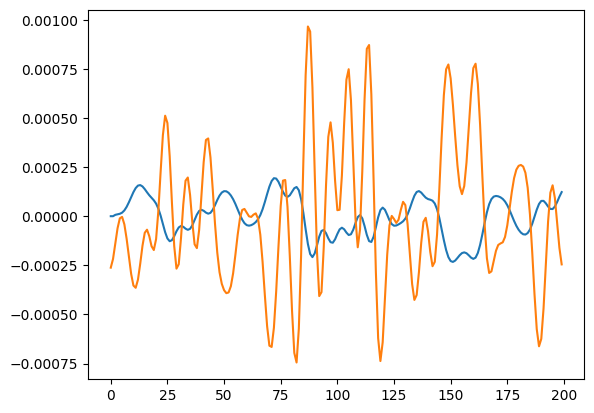

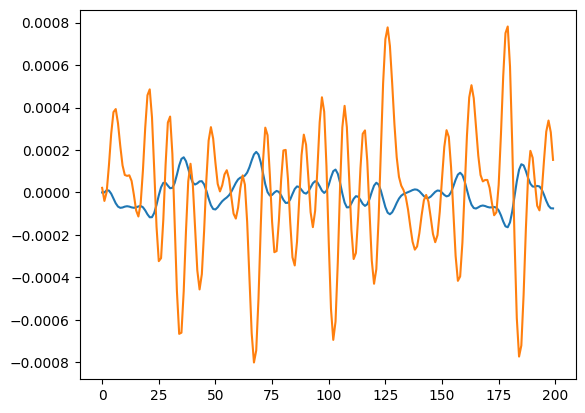

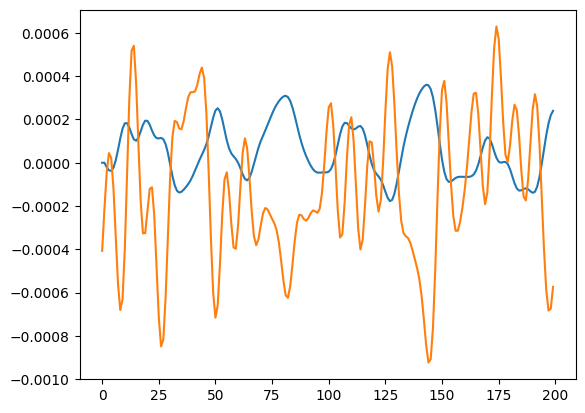

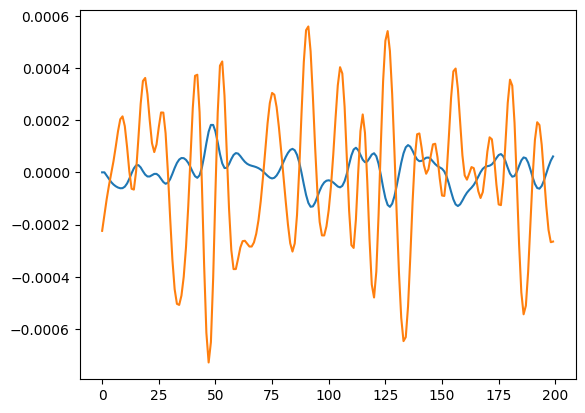

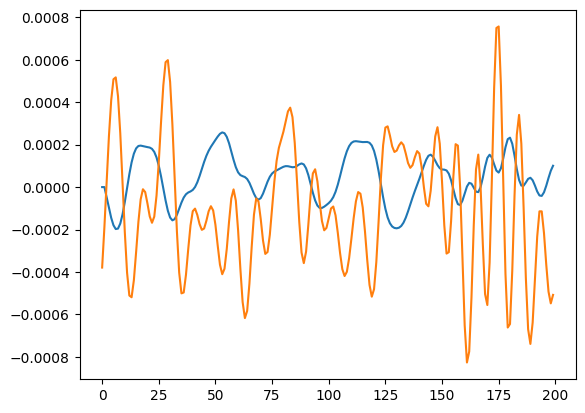

In [10]:
z_pathologic=z[np.average(np.abs(z),axis=(-1,-2)) < 10**-3]

h_pathologic=h[np.average(np.abs(z),axis=(-1,-2)) < 10**-3]


print(z_pathologic.shape)

for i in range(5):
    plt.plot(z_pathologic[i,:,0])
    plt.plot(h_pathologic[i,:,0])
    plt.show()     

#### Plot some samples!

In [ ]:
for sample in range(5):
    for l in range(h.shape[-1]):
        plt.plot(t,h[sample,:,l])
        plt.plot(t,z[sample,:,l])
        plt.show()
        

#### Check the bug of the different magnetization

In [6]:
from src.qutip_lab.qutip_class import SpinOperator, SpinHamiltonian, SteadyStateSolver
import numpy as np
import qutip
from tqdm import tqdm, trange
from typing import Dict, List, Tuple, Union
import matplotlib.pyplot as plt
from qutip.solver import Options
import argparse

data=np.load('data/gaussian_driving/simulation_size_2_tf_10.0_dt_0.05_sigma_10_40_c_0_4.0_noise_1_n_dataset_10.npz')

h=data['potential']
z=data['density']
t=data['time']




#### Create larger datasets

In [8]:
import numpy as np
set_i=1
for i in range(set_i):
    data=np.load(f'data/gaussian_driving/trainset_1/{i+1}_size_6_tf_10.0_dt_0.05_sigma_10_40_c_0_4.0_noise_100_n_dataset_15000.npz')
    
    if i==0:
        z=data['density']
        h=data['potential']
        time=data['time']
    else:
        z=np.append(z,data['density'],axis=0)
        h=np.append(h,data['potential'],axis=0)
        
np.savez(f'data/gaussian_driving/train_size_6_tf_10.0_dt_0.05_sigma_10_40_c_0_4.0_noise_100_n_dataset_{15000*set_i}',density=z,potential=h,time=time)
    
    